In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Example: Population Trends

We are now ready to work with large tables of data. The file below contains "Annual Estimates of the Resident Population by Single Year of Age and Sex for the United States." Notice that read_table can read data directly from a URL.

In [2]:
census_data=pd.read_csv('http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv')
census_data

,SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
1,0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
2,0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
3,0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
4,0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
...,...,...,...,...,...,...,...,...,...,...
301,2,97,53582,53605,54118,57159,59533,61255,62779,69285
302,2,98,36641,36675,37532,40116,42857,44359,46208,47272
303,2,99,26193,26214,26074,27030,29320,31112,32517,34064
304,2,100,44202,44246,45058,47556,50661,53902,58008,61886


Typically, a public table will contain more information than necessary for a particular investigation or analysis. In this case, let us suppose that we are only interested in the population changes from 2010 to 2014. Let us select the relevant columns.

In [3]:
C1=census_data[['AGE','SEX','POPESTIMATE2010','POPESTIMATE2014']]
C1
C3=C1

We can also simplify the labels of the selected columns.

In [4]:
C1.head(2)

,AGE,SEX,POPESTIMATE2010,POPESTIMATE2014
0,0,0,3951330,3949775
1,1,0,3957888,3949776


In [5]:
C1.rename(columns = {"POPESTIMATE2010":'2010',"POPESTIMATE2014":'2014'}, inplace = True)
C1

C:\Users\LEKSHMI HARITHA\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,AGE,SEX,2010,2014
0,0,0,3951330,3949775
1,1,0,3957888,3949776
2,2,0,4090862,3959664
3,3,0,4111920,4007079
4,4,0,4077551,4005716
...,...,...,...,...
301,97,2,54118,62779
302,98,2,37532,46208
303,99,2,26074,32517
304,100,2,45058,58008


We now have a table that is easy to work with. Each column of the table is an array of the same length, and so columns can be combined using arithmetic. Here is the change in population between 2010 and 2014.

In [6]:
change=C1['2014']-C1['2010']
change

0        -1555
1        -8112
2      -131198
3      -104841
4       -71835
        ...   
301       8661
302       8676
303       6443
304      12950
305    4693244
Length: 306, dtype: int64

Let us augment us_pop with a column that contains these changes, both in absolute terms and as percents relative to the value in 2010.

In [7]:
percentage_change=(((C1['2014']-C1['2010'])/C1['2010']) * 100)
percentage_change

0      -0.039354
1      -0.204958
2      -3.207099
3      -2.549685
4      -1.761719
         ...    
301    16.003917
302    23.116274
303    24.710440
304    28.740734
305     2.984407
Length: 306, dtype: float64

In [8]:
C1

,AGE,SEX,2010,2014
0,0,0,3951330,3949775
1,1,0,3957888,3949776
2,2,0,4090862,3959664
3,3,0,4111920,4007079
4,4,0,4077551,4005716
...,...,...,...,...
301,97,2,54118,62779
302,98,2,37532,46208
303,99,2,26074,32517
304,100,2,45058,58008


In [9]:
C2=C1
FFF=C1

In [10]:
C2['Change'],C2['Percentage Change']=[change,percentage_change]
C2

<ipython-input-10-357d544fc1c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C2['Change'],C2['Percentage Change']=[change,percentage_change]


,AGE,SEX,2010,2014,Change,Percentage Change
0,0,0,3951330,3949775,-1555,-0.039354
1,1,0,3957888,3949776,-8112,-0.204958
2,2,0,4090862,3959664,-131198,-3.207099
3,3,0,4111920,4007079,-104841,-2.549685
4,4,0,4077551,4005716,-71835,-1.761719
...,...,...,...,...,...,...
301,97,2,54118,62779,8661,16.003917
302,98,2,37532,46208,8676,23.116274
303,99,2,26074,32517,6443,24.710440
304,100,2,45058,58008,12950,28.740734


Sorting the data. Let us sort the table in decreasing order of the absolute change in population.

In [11]:
C2=C2.sort_values(by=['Change'], ascending=False)
C2

,AGE,SEX,2010,2014,Change,Percentage Change
101,999,0,309346863,318907401,9560538,3.090556
203,999,1,152088043,156955337,4867294,3.200313
305,999,2,157258820,161952064,4693244,2.984407
67,67,0,2693707,3485241,791534,29.384562
64,64,0,2706055,3487559,781504,28.879827
...,...,...,...,...,...,...
39,39,0,4324463,3982507,-341956,-7.907479
48,48,0,4534663,4159738,-374925,-8.267979
46,46,0,4529716,4077151,-452565,-9.991024
47,47,0,4535473,4082883,-452590,-9.978893


In [12]:
C3=FFF


Example: Trends in Gender 
    We are now equipped with enough coding skills to examine features and trends in subgroups of the U.S. population. In this example, we will look at the distribution of males and females across age groups. We will continue using the us_pop table from the previous section.

Understanding AGE = 100 
As a preliminary, let's interpret data in the final age category in the table, where AGE is 100. The code below extracts the rows for the combined group of men and women (SEX code 0) for the highest ages.

In [13]:
C3[(C3.AGE == 100) & (C3.SEX == 0)]

,AGE,SEX,2010,2014,Change,Percentage Change
100,100,0,54410,71626,17216,31.641242


In [14]:
bool_series = C3["AGE"].between(97, 101, inclusive = True) 
C3[bool_series & (C3.SEX == 0)]

,AGE,SEX,2010,2014,Change,Percentage Change
97,97,0,68893,83089,14196,20.605867
98,98,0,47037,59726,12689,26.976635
99,99,0,32178,41468,9290,28.870657
100,100,0,54410,71626,17216,31.641242


Overall Proportions of Males and Females 
We will now begin looking at gender ratios in 2014. First, let's look at all the age groups together. Remember that this means looking at the rows where the "age" is coded 999. The table all_ages contains this information. There are three rows: one for the total of both genders, one for males (SEX code 1), and one for females (SEX code 2).

In [15]:
C4=C3.drop('2010',axis=1)

In [16]:
C5=C4.drop('Change',axis=1)

In [17]:
C6=C5.drop('Percentage Change',axis=1)

In [18]:
C6

,AGE,SEX,2014
0,0,0,3949775
1,1,0,3949776
2,2,0,3959664
3,3,0,4007079
4,4,0,4005716
...,...,...,...
301,97,2,62779
302,98,2,46208
303,99,2,32517
304,100,2,58008


In [19]:
C7=C6[(C6.AGE == 999)]
C7

,AGE,SEX,2014
101,999,0,318907401
203,999,1,156955337
305,999,2,161952064


For comparability with other quantities, we will need to convert these counts to percents out of the total population. Let's access the total for 2014 and name it. Then, we'll show a population table with a proportion column. Consistent with our earlier observation that there were more females than males, about 50.8% of the population in 2014 was female and about 49.2% male in each of the two years.

In [20]:
proportionf=(C7.iloc[2][2]/C7.iloc[0][2])*100
proportionf

50.783413458629646

In [21]:
proportionm=(C7.iloc[1][2]/C7.iloc[0][2])*100
proportionm

49.21658654137036

In [22]:
proportion=['100%','49.21%','50.78%']

In [23]:
C7['Proportion']=proportion
C7

<ipython-input-23-8594176b2559>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C7['Proportion']=proportion


,AGE,SEX,2014,Proportion
101,999,0,318907401,100%
203,999,1,156955337,49.21%
305,999,2,161952064,50.78%


## Proportions of Boys and Girls among Infants
When we look at infants, however, the opposite is true. Let's define infants to be babies who have not yet completed one year, represented in the row corresponding to AGE 0. Here are their numbers in the population. You can see that male infants outnumbered female infants.

In [24]:
infants=C6[(C6.AGE==0)]
infants

,AGE,SEX,2014
0,0,0,3949775
102,0,1,2020326
204,0,2,1929449


As before, we can convert these counts to percents out of the total numbers of infants. The resulting table shows that in 2014, just over 51% of infants in the U.S. were male.

In [25]:
proportionf=(infants.iloc[2][2]/infants.iloc[0][2])*100
proportionf

48.849592698318254

In [26]:
proportionm=(infants.iloc[1][2]/infants.iloc[0][2])*100
proportionm

51.150407301681746

In [27]:
proportion=['100%','51.15%','48.84%']

In [28]:
infants['Proportion']=proportion
infants

<ipython-input-28-b5e3ff5deb23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infants['Proportion']=proportion


,AGE,SEX,2014,Proportion
0,0,0,3949775,100%
102,0,1,2020326,51.15%
204,0,2,1929449,48.84%


## Female:Male Gender Ratio at Each Age
We have seen that while there are more baby boys than baby girls, there are more females than males overall. So it's clear that the split between genders must vary across age groups.

In [29]:
FEMALES= C6[(C6.SEX == 2)]
FEMALES

,AGE,SEX,2014
204,0,2,1929449
205,1,2,1931375
206,2,2,1935991
207,3,2,1957483
208,4,2,1961199
...,...,...,...
301,97,2,62779
302,98,2,46208
303,99,2,32517
304,100,2,58008


In [30]:
MALES= C6[(C6.SEX == 1)]
MALES

,AGE,SEX,2014
102,0,1,2020326
103,1,1,2018401
104,2,1,2023673
105,3,1,2049596
106,4,1,2044517
...,...,...,...
199,97,1,20310
200,98,1,13518
201,99,1,8951
202,100,1,13618


The plan now is to compare the number of women and the number of men at each age, for each of the two years. Array and Table methods give us straightforward ways to do this. Both of these tables have one row for each age.

In [31]:
farray= np.array(FEMALES['AGE'])
farray

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 999], dtype=int64)

In [32]:
marray= np.array(MALES['AGE'])
marray

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 999], dtype=int64)

For any given age, we can get the Female:Male gender ratio by dividing the number of females by the number of males. To do this in one step, we can use column to extract the array of female counts and the corresponding array of male counts, and then simply divide one array by the other. Elementwise division will create an array of gender ratios for all the years.

In [33]:
ratios = pd.DataFrame({
    'AGE': np.array(FEMALES['AGE']),
    '2014 F:M RATIO': np.array(FEMALES['2014'])/np.array(MALES['2014'])
})    
ratios

,AGE,2014 F:M RATIO
0,0,0.955019
1,1,0.956884
2,2,0.956672
3,3,0.955058
4,4,0.959248
...,...,...
97,97,3.091039
98,98,3.418257
99,99,3.632778
100,100,4.259656


So how can the overall proportion of females in the population be higher than the males?

Something extraordinary happens when we examine the other end of the age range. Here are the Female:Male ratios for people aged more than 75.

In [34]:
P=ratios[ratios['AGE'] > 75]
P

,AGE,2014 F:M RATIO
76,76,1.234867
77,77,1.257965
78,78,1.282442
79,79,1.316273
80,80,1.341383
81,81,1.379669
82,82,1.419317
83,83,1.465520
84,84,1.520484
85,85,1.575604


Not only are all of these ratios greater than 1, signifying more women than men in all of these age groups, many of them are considerably greater than 1.

At ages 89 and 90 the ratios are close to 2, meaning that there were about twice as many women as men at those ages in 2014.
At ages 98 and 99, there were about 3.5 to 4 times as many women as men.If you are wondering how many people there were at these advanced ages, you can use Python to find out:

In [35]:
OLDER = MALES[(MALES["AGE"].between(98, 99, inclusive = True)) ]
OLDER

,AGE,SEX,2014
200,98,1,13518
201,99,1,8951


In [36]:
OLDER = FEMALES[(FEMALES["AGE"].between(98, 99, inclusive = True)) ]
OLDER

,AGE,SEX,2014
302,98,2,46208
303,99,2,32517


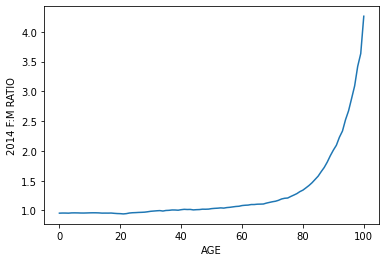

In [54]:
plt.plot(P['AGE'], P['2014 F:M RATIO'])
plt.xlabel('AGE')
plt.ylabel('2014 F:M RATIO')
plt.show()

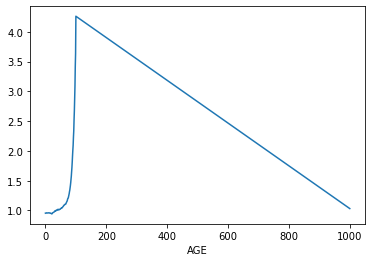

In [48]:
ratios.plot.line('AGE', '2014 F:M RATIO', legend=False)
plt.show()

In [ ]:
plt.